In [1]:
import matplotlib.pyplot as plot
import matplotlib.dates as mdates
import pandas
import seaborn as sns
# %matplotlib notebook
%matplotlib inline
pandas.set_option('display.max_colwidth', -1)

Tweets are obtained from the [trump tweet archive](https://github.com/bpb27/trump-tweet-archive/tree/master/data/realdonaldtrump) and concatenated.

In [2]:
tweets = pandas.read_csv("trumptweets.csv")
tweets['count'] = 1
tweets['date'] = pandas.to_datetime(tweets['created_at'])
tweets['time'] = tweets['date'].dt.time
tweets['hour'] = tweets['date'].dt.hour
tweets['weekday'] = tweets['date'].dt.weekday
tweets['metatweet'] = tweets['text'].str.startswith('\"@')
tweets['contains_url'] = tweets['text'].str.find('http') >= 0
tweets.head()

,source,favorite_count,created_at,retweet_count,text,id_str,in_reply_to_user_id_str,is_retweet,count,date,time,hour,weekday,metatweet,contains_url
0,Twitter Web Client,12,Wed Dec 23 17:38:18 +0000 2009,28,"From Donald Trump: Wishing everyone a wonderful holiday & a happy, healthy, prosperous New Year. Let’s think like champions in 2010!",6971079756,NaN,False,1,2009-12-23 17:38:18,17:38:18,17,2,False,False
1,Twitter Web Client,6,Thu Dec 03 19:39:09 +0000 2009,33,Trump International Tower in Chicago ranked 6th tallest building in world by Council on Tall Buildings & Urban Habitat http://bit.ly/sqvQq,6312794445,NaN,False,1,2009-12-03 19:39:09,19:39:09,19,3,False,True
2,Twitter Web Client,11,Thu Nov 26 19:55:38 +0000 2009,13,Wishing you and yours a very Happy and Bountiful Thanksgiving!,6090839867,NaN,False,1,2009-11-26 19:55:38,19:55:38,19,3,False,False
3,Twitter Web Client,3,Mon Nov 16 21:06:10 +0000 2009,5,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc",5775731054,NaN,False,1,2009-11-16 21:06:10,21:06:10,21,0,False,True
4,Twitter Web Client,6,Mon Nov 02 14:57:56 +0000 2009,7,"--Work has begun, ahead of schedule, to build the greatest golf course in history: Trump International – Scotland.",5364614040,NaN,False,1,2009-11-02 14:57:56,14:57:56,14,0,False,False


First, let's consolidate everything according to month, which will make it easier to graph later on.

In [3]:
def read_monthly(tweets):
    monthly_tweets = tweets 
    monthly_tweets = monthly_tweets.set_index('date').groupby(pandas.TimeGrouper('1M')).apply(lambda x: x.groupby('source').sum())
    monthly_tweets = monthly_tweets.sort_index()
    monthly_tweets.reset_index(inplace=True)
    return monthly_tweets

In [4]:
def read_weekly(tweets):
    monthly_tweets = tweets 
    monthly_tweets = monthly_tweets.set_index('date').groupby(pandas.TimeGrouper('1W')).apply(lambda x: x.groupby('source').sum())
    monthly_tweets = monthly_tweets.sort_index()
    monthly_tweets.reset_index(inplace=True)
    return monthly_tweets

In [5]:
monthly_tweets = read_monthly(tweets)
monthly_tweets.head()

,date,source,favorite_count,retweet_count,id_str,in_reply_to_user_id_str,is_retweet,count,hour,weekday,metatweet,contains_url
0,2009-05-31,Twitter Web Client,2418.0,1841.0,3.834032e+10,NaN,0.0,21.0,315.0,55.0,0.0,17.0
1,2009-06-30,Twitter Web Client,163.0,111.0,2.434537e+10,NaN,0.0,11.0,184.0,29.0,0.0,9.0
2,2009-07-31,Twitter Web Client,41.0,34.0,1.341214e+10,NaN,0.0,5.0,80.0,10.0,0.0,4.0
3,2009-08-31,Twitter Web Client,58.0,53.0,2.368333e+10,NaN,0.0,7.0,105.0,24.0,0.0,6.0
4,2009-09-30,Twitter Web Client,66.0,52.0,1.214335e+10,NaN,0.0,3.0,43.0,2.0,0.0,3.0


In [6]:
monthly_tweets.groupby('source').sum()

,favorite_count,retweet_count,id_str,in_reply_to_user_id_str,is_retweet,count,hour,weekday,metatweet,contains_url
source,,,,,,,,,,
Facebook,16113.0,23581.0,3.206288e+19,NaN,0.0,105.0,1612.0,201.0,0.0,67.0
Instagram,109422.0,59863.0,7.062195e+19,NaN,0.0,133.0,2144.0,274.0,0.0,133.0
Media Studio,88339.0,28827.0,1.627806e+18,NaN,0.0,2.0,23.0,3.0,0.0,2.0
Mobile Web (M5),11506.0,13746.0,1.778468e+19,5.728094e+07,0.0,56.0,563.0,105.0,1.0,3.0
Neatly For BlackBerry 10,233.0,179.0,2.802120e+18,NaN,0.0,5.0,63.0,24.0,0.0,5.0
Periscope,38985.0,14475.0,4.609777e+18,NaN,0.0,7.0,118.0,11.0,0.0,7.0
TweetDeck,60975.0,113396.0,6.114553e+19,1.413723e+09,0.0,483.0,8233.0,978.0,0.0,130.0
TwitLonger Beta,13912.0,46680.0,7.602234e+19,1.591820e+09,0.0,405.0,7106.0,854.0,1.0,391.0
Twitlonger,564.0,1043.0,8.605529e+18,NaN,0.0,23.0,381.0,57.0,0.0,23.0


In [7]:
def filter_iphone(tweets):
    is_iphone = tweets['source'] == 'Twitter for iPhone'
    return tweets[(is_iphone)]

def filter_android(tweets):
    is_android = tweets['source'] == 'Twitter for Android'
    return tweets[(is_android)]

In [8]:

tweets[(tweets['date'].dt.year == 2016) & (tweets['date'].dt.month == 11)]

,source,favorite_count,created_at,retweet_count,text,id_str,in_reply_to_user_id_str,is_retweet,count,date,time,hour,weekday,metatweet,contains_url
26105,Twitter for iPhone,52300,Wed Nov 30 20:00:14 +0000 2016,14758,'Donald Trump is already helping the working class' https://t.co/GTuNcQhLYx,804052438546317312,NaN,False,1,2016-11-30 20:00:14,20:00:14,20,2,False,True
26106,Twitter for iPhone,0,Wed Nov 30 19:51:16 +0000 2016,7382,RT @DanScavino: Great interview on @foxandfriends by @SteveDoocy w/ Carrier employee- who has a message for #PEOTUS @realDonaldTrump &amp; #VPE…,804050182170116096,NaN,True,1,2016-11-30 19:51:16,19:51:16,19,2,False,False
26107,Twitter for iPhone,26141,Wed Nov 30 16:21:26 +0000 2016,7113,"'President-elect Donald J. Trump today announced his intent to nominate Steven Mnuchin, Wilbur Ross &amp; Todd Ricketts… https://t.co/cEBxoWsnYp",803997374016167936,NaN,False,1,2016-11-30 16:21:26,16:21:26,16,2,False,True
26108,Twitter for iPhone,30567,Wed Nov 30 15:23:43 +0000 2016,8024,"Join me in Cincinnati, Ohio tomorrow evening at 7:00pm. I am grateful for all of your support. THANK YOU!\nTickets:… https://t.co/51Emq7Tffa",803982850081099776,NaN,False,1,2016-11-30 15:23:43,15:23:43,15,2,False,True
26109,Twitter for Android,77536,Wed Nov 30 11:59:38 +0000 2016,17541,"Hence, legal documents are being crafted which take me completely out of business operations. The Presidency is a far more important task!",803931490514075648,NaN,False,1,2016-11-30 11:59:38,11:59:38,11,2,False,False
26110,Twitter for Android,50953,Wed Nov 30 11:54:40 +0000 2016,11266,"do this under the law, I feel it is visually important, as President, to in no way have a conflict of interest with my various businesses..",803930240661811200,NaN,False,1,2016-11-30 11:54:40,11:54:40,11,2,False,False
26111,Twitter for Android,45403,Wed Nov 30 11:44:52 +0000 2016,10670,great business in total in order to fully focus on running the country in order to MAKE AMERICA GREAT AGAIN! While I am not mandated to ....,803927774784344064,NaN,False,1,2016-11-30 11:44:52,11:44:52,11,2,False,False
26112,Twitter for Android,45241,Wed Nov 30 11:39:45 +0000 2016,11313,I will be holding a major news conference in New York City with my children on December 15 to discuss the fact that I will be leaving my ...,803926488579973120,NaN,False,1,2016-11-30 11:39:45,11:39:45,11,2,False,False
26113,Twitter for Android,107641,Wed Nov 30 11:20:01 +0000 2016,34427,ISIS is taking credit for the terrible stabbing attack at Ohio State University by a Somali refugee who should not have been in our country.,803921522784092160,NaN,False,1,2016-11-30 11:20:01,11:20:01,11,2,False,False
26114,Twitter for Android,83764,Wed Nov 30 03:50:44 +0000 2016,18716,Big day on Thursday for Indiana and the great workers of that wonderful state.We will keep our companies and jobs in the U.S. Thanks Carrier,803808454620094465,NaN,False,1,2016-11-30 03:50:44,03:50:44,3,2,False,False


In [9]:
orig_tweets = tweets[tweets['metatweet']==False]

In [10]:
def plot_time(orig_tweets):
    fig, ax = plot.subplots()
    iphone_tweets = filter_iphone(orig_tweets)
    android_tweets = filter_android(orig_tweets)

    ax.plot_date(iphone_tweets['date'], iphone_tweets['count'], fmt='.', color='r', label='iphone')
    ax.plot_date(android_tweets['date'], android_tweets['count'], fmt='.', color='b', label='android')
    ax.set_ylim(0, max(iphone_tweets['count'].values.max(), android_tweets['count'].values.max())+1)
    fig.autofmt_xdate()
    plot.xlabel('Date')
    plot.ylabel('Counts')
    plot.show()

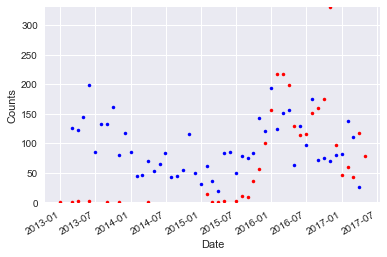

In [11]:
plot_time(read_monthly(orig_tweets))

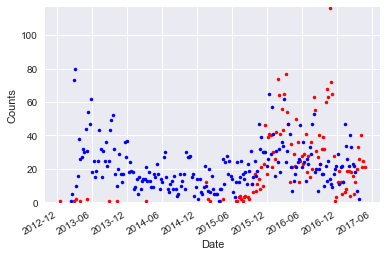

In [12]:
plot_time(read_weekly(orig_tweets))

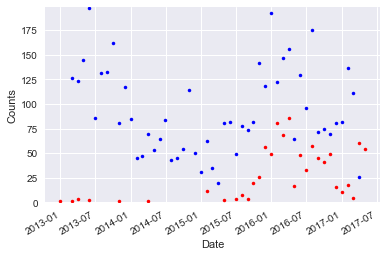

In [13]:
plot_time(read_monthly(orig_tweets[orig_tweets['contains_url'] == False]))

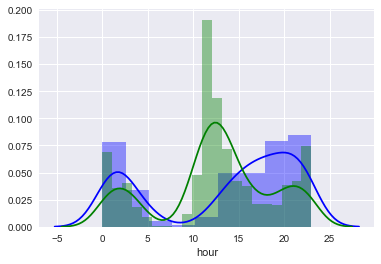

In [14]:
sns.distplot(filter_iphone(orig_tweets[orig_tweets['date'].dt.year==2016])['hour'], color='b')
sns.distplot(filter_android(orig_tweets[orig_tweets['date'].dt.year==2016])['hour'], color='g')

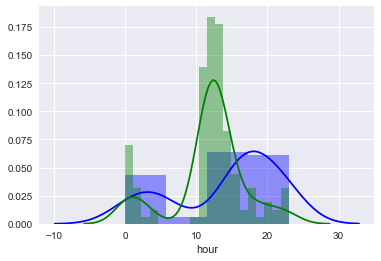

In [15]:
sns.distplot(filter_iphone(orig_tweets[(orig_tweets['date'].dt.year==2017)&(orig_tweets['date'].dt.month==1)])['hour'], color='b')
sns.distplot(filter_android(orig_tweets[(orig_tweets['date'].dt.year==2017)&(orig_tweets['date'].dt.month==1)])['hour'], color='g')

In [16]:
filter_android(orig_tweets)[filter_android(orig_tweets)['text'].str.contains("\?")]

,source,favorite_count,created_at,retweet_count,text,id_str,in_reply_to_user_id_str,is_retweet,count,date,time,hour,weekday,metatweet,contains_url
4575,Twitter for Android,199,Sun Dec 22 23:13:00 +0000 2013,205,"#HasJustineLandedYet- Justine, what the hell are you doing, are you crazy? Not nice or fair! I will support @AidForAfrica. Justine is FIRED!",414896380768161793,NaN,False,1,2013-12-22 23:13:00,23:13:00,23,6,False,False
4667,Twitter for Android,1231,Tue Dec 17 13:56:11 +0000 2013,716,Who thinks that President Obama is totally incompetent?,412944317041639424,NaN,False,1,2013-12-17 13:56:11,13:56:11,13,1,False,False
4680,Twitter for Android,478,Sun Dec 15 00:32:54 +0000 2013,749,"Wow, it's snowing in Isreal and on the pyramids in Egypt. Are we still wasting billions on the global warming con? MAKE U.S. COMPETITIVE!",412017385345138688,NaN,False,1,2013-12-15 00:32:54,00:32:54,0,6,False,False
4720,Twitter for Android,518,Wed Dec 11 12:09:47 +0000 2013,636,"President Obama's approval rating, at 38%, is at an all-time low. Gee, I wonder why?",410743213084119040,NaN,False,1,2013-12-11 12:09:47,12:09:47,12,2,False,False
4827,Twitter for Android,408,Tue Dec 03 23:42:34 +0000 2013,464,"Denver, Minnesota and others are bracing for some of the coldest weather on record. What are the global warming geniuses saying about this?",408018451362766849,NaN,False,1,2013-12-03 23:42:34,23:42:34,23,1,False,False
4848,Twitter for Android,63,Tue Dec 03 11:41:58 +0000 2013,36,Remember I predicted that New York Magazine would fold and people scoffed? Just announced (N.Y.Post) it lost big $'s &amp; is cutting way back!,407837109870157824,NaN,False,1,2013-12-03 11:41:58,11:41:58,11,1,False,False
4967,Twitter for Android,112,Mon Nov 25 04:18:35 +0000 2013,145,We had all the leverage in our nuclear negotiations with Iran and our leaders foolishly decided to let them out of the trap. WHY?,404826425729232896,NaN,False,1,2013-11-25 04:18:35,04:18:35,4,0,False,False
4977,Twitter for Android,334,Sat Nov 23 13:09:19 +0000 2013,437,"Snow and ice, freezing weather, in Texas, Arizona and Oklahoma - what the hell is going on with GLOBAL WARMING?",404235212487655424,NaN,False,1,2013-11-23 13:09:19,13:09:19,13,5,False,False
4993,Twitter for Android,638,Fri Nov 22 01:23:32 +0000 2013,614,"Weak newscasters are asking ""is there a racial component to knockout attacks?"" Of course there is and weakness will only make it worse!",403695208870973440,NaN,False,1,2013-11-22 01:23:32,01:23:32,1,4,False,False
5048,Twitter for Android,277,Mon Nov 18 12:59:03 +0000 2013,282,President Obama played golf yesterday???,402420689560686592,NaN,False,1,2013-11-18 12:59:03,12:59:03,12,0,False,False


In [17]:
filter_iphone(orig_tweets)[filter_iphone(orig_tweets)['text'].str.contains("\?")]

,source,favorite_count,created_at,retweet_count,text,id_str,in_reply_to_user_id_str,is_retweet,count,date,time,hour,weekday,metatweet,contains_url
18692,Twitter for iPhone,3315,Tue Dec 15 01:16:53 +0000 2015,1149,Why doesn't @CNN use the #CNN Iowa poll? @andersoncooper @andydean2014,676571597285687296,NaN,False,1,2015-12-15 01:16:53,01:16:53,1,1,False,False
18965,Twitter for iPhone,2296,Thu Dec 03 16:49:45 +0000 2015,865,Why can't @Politico get better reporters than Ben Schreckenger? Guy is a major lightweight with no credibility. So dishonest!,672457707912302594,NaN,False,1,2015-12-03 16:49:45,16:49:45,16,3,False,False
18994,Twitter for iPhone,3699,Wed Dec 02 20:26:52 +0000 2015,2011,"Thank you CBS &amp; Breitbart-total vindication! Will the mainstream media apologize? Many, many witnesses. \n#Trump2016 https://t.co/AsxnfFWipJ",672149956208271360,NaN,False,1,2015-12-02 20:26:52,20:26:52,20,2,False,True
19013,Twitter for iPhone,4196,Tue Dec 01 20:46:51 +0000 2015,1668,"Highly untalented Wash Post blogger, Jennifer Rubin, a real dummy, never writes fairly about me. Why does Wash Post have low IQ people?",671792600052027393,NaN,False,1,2015-12-01 20:46:51,20:46:51,20,1,False,False
19017,Twitter for iPhone,6863,Tue Dec 01 15:20:40 +0000 2015,3985,Look at the editorial I was just sent from the NY Post on 9/14/01 - 3 days after collapse of WTC. Any apologies? https://t.co/b6DKEOk8Px,671710514007904256,NaN,False,1,2015-12-01 15:20:40,15:20:40,15,1,False,True
19027,Twitter for iPhone,4655,Mon Nov 30 14:09:34 +0000 2015,3298,"How is Chris Christie running the state of NJ, which is deeply troubled, when he is spending all of his time in NH? New Jerseyans not happy!",671330229596659712,NaN,False,1,2015-11-30 14:09:34,14:09:34,14,0,False,False
19113,Twitter for iPhone,2655,Tue Nov 24 22:03:45 +0000 2015,1077,What is Frank VanderSloot getting for agreeing to back Marco Rubio? Last victim was Mitt Romney - see how that turned out.,669275236160954372,NaN,False,1,2015-11-24 22:03:45,22:03:45,22,1,False,False
19491,Twitter for iPhone,3366,Fri Nov 06 14:08:17 +0000 2015,3005,"With Ben Carson wanting to hit his mother on head with a hammer, stab a friend and Pyramids built for grain storage - don't people get it?",662632599962173440,NaN,False,1,2015-11-06 14:08:17,14:08:17,14,4,False,False
19684,Twitter for iPhone,2033,Thu Oct 29 15:28:51 +0000 2015,1110,Via @Slate: Who won the #GOPDebate? https://t.co/YHsCQpG63v,659753771791024128,NaN,False,1,2015-10-29 15:28:51,15:28:51,15,3,False,True
19827,Twitter for iPhone,3302,Sat Oct 24 20:44:18 +0000 2015,1748,".@JebBush is slashing campaign salaries, people making millions. If he can't manage his campaign, how can he manage our countries finances?",658021218847715328,NaN,False,1,2015-10-24 20:44:18,20:44:18,20,5,False,False


In [18]:
orig_iphone_tweets = filter_iphone(orig_tweets)
orig_android_tweets = filter_android(orig_tweets)

In [19]:
len(orig_iphone_tweets[orig_iphone_tweets['date'].dt.year == 2016])

1952

In [20]:
len(orig_android_tweets[orig_android_tweets['date'].dt.year == 2016])

1277

In [21]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [22]:
from collections import defaultdict
word_cnts = defaultdict(int)
for tweet in orig_tweets['text']:
#     print(tweet)
    for word in nlp(tweet):
        word_cnts[word.text] += 1